In [2]:
import os
import sys
# module_path = os.path.abspath(os.path.join('../umlsparser'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt



C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_21940\1751670079.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


 UMLS <br>
○ Get familiar with the offline UMLS <br>
○ Be aware of where we're extracting subgraphs<br>
○ Read into what vocabularies<br>
○ Understand what categories and topics really exist<br>
○ What topics and terminologies are being used<br>
○ Check recording at 11:28<br>
○ Diseases drugs and genes<br>
• Use MRCONSO.RRF<br>
○ A few things missing from here from the full UMLS<br>
• MRCONSO.RRF UMLS GitHUB<br>
• BioBART, SciFive - look at these models<br>
○ Do tutorials on these<br>
 T5 and BART tutorials<br>

## Concepts and Sources

In [3]:
# check contents

with open ('2023AA/META/MRCONSO.RRF') as f:
    for i in range(5):
        line = f.readline()
        print(line)

C0000005|ENG|P|L0000005|PF|S0007492|Y|A26634265||M0019694|D012711|MSH|PEP|D012711|(131)I-Macroaggregated Albumin|0|N|256|

C0000005|ENG|S|L0270109|PF|S0007491|Y|A26634266||M0019694|D012711|MSH|ET|D012711|(131)I-MAA|0|N|256|

C0000005|FRE|P|L6220710|PF|S7133957|Y|A13433185||M0019694|D012711|MSHFRE|PEP|D012711|Macroagrégats d'albumine marquée à l'iode 131|3|N||

C0000005|FRE|S|L6215648|PF|S7133916|Y|A27488794||M0019694|D012711|MSHFRE|ET|D012711|MAA-I 131|3|N||

C0000005|FRE|S|L6215656|PF|S7133956|Y|A27614225||M0019694|D012711|MSHFRE|ET|D012711|Macroagrégats d'albumine humaine marquée à l'iode 131|3|N||



In [4]:
df = pd.read_csv('2023AA/META/MRCONSO.RRF', delimiter = '|')
df.shape

C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_21940\3328187778.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2023AA/META/MRCONSO.RRF', delimiter = '|')


(13501907, 19)

In [5]:
df.head()

,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,Unnamed: 8,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256,Unnamed: 18
0,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0,N,256.0,NaN
1,C0000005,FRE,P,L6220710,PF,S7133957,Y,A13433185,NaN,M0019694,D012711,MSHFRE,PEP,D012711,Macroagrégats d'albumine marquée à l'iode 131,3,N,NaN,NaN
2,C0000005,FRE,S,L6215648,PF,S7133916,Y,A27488794,NaN,M0019694,D012711,MSHFRE,ET,D012711,MAA-I 131,3,N,NaN,NaN
3,C0000005,FRE,S,L6215656,PF,S7133956,Y,A27614225,NaN,M0019694,D012711,MSHFRE,ET,D012711,Macroagrégats d'albumine humaine marquée à l'iode 131,3,N,NaN,NaN
4,C0000005,SWE,P,L17197376,PF,S20758072,Y,A33245954,NaN,M0019694,D012711,MSHSWE,ET,D012711,(131)I-Makroaggregerat albumin,3,N,NaN,NaN


In [6]:
def clean_data(data):
    cols = data.columns
    empty_cols = list(filter(lambda x: 'unnamed' in x.lower(), cols))
    data = data.shift(1)
    data.loc[0] = cols
    for col in empty_cols:
        if data[col].isna().mean() > 0.99:
            data = data.drop(col, axis = 1)
        else:
            data.loc[0,col] = np.nan
    return data

df = clean_data(df)

In [7]:
df.head(2)

,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,Unnamed: 8,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0


In [8]:
df.columns = ['CUI','LAT','TS','LUI','STT',
              'SUI','ISPREF','AUI','SAUI',
              'SCUI','SDUI','SAB','TTY',
              'CODE','STR','SRL','SUPPRESS',
              'CVF']

In [9]:
df.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0
2,C0000005,FRE,P,L6220710,PF,S7133957,Y,A13433185,NaN,M0019694,D012711,MSHFRE,PEP,D012711,Macroagrégats d'albumine marquée à l'iode 131,3.0,N,NaN
3,C0000005,FRE,S,L6215648,PF,S7133916,Y,A27488794,NaN,M0019694,D012711,MSHFRE,ET,D012711,MAA-I 131,3.0,N,NaN
4,C0000005,FRE,S,L6215656,PF,S7133956,Y,A27614225,NaN,M0019694,D012711,MSHFRE,ET,D012711,Macroagrégats d'albumine humaine marquée à l'iode 131,3.0,N,NaN


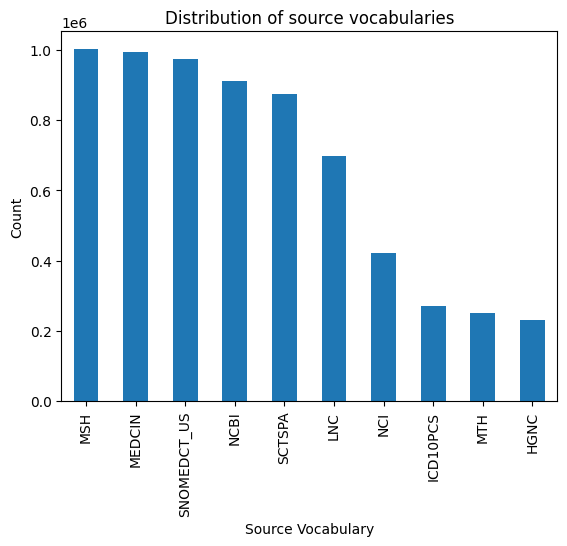

In [10]:
# Source distribution
df.SAB.value_counts()[:10].plot(kind = 'bar')
plt.xlabel("Source Vocabulary")
plt.ylabel("Count")
plt.title("Distribution of source vocabularies")
plt.show()

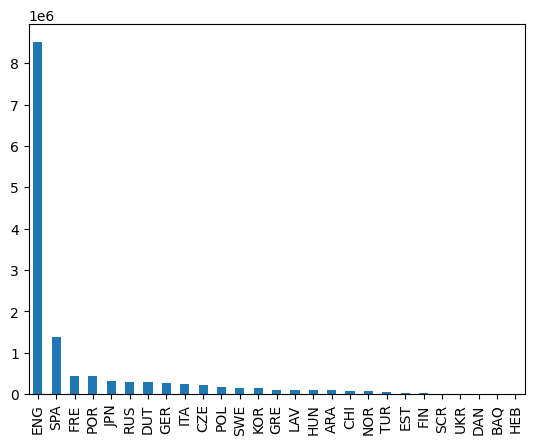

In [11]:
df.LAT.value_counts().plot(kind = 'bar')
plt.show()

In [12]:
# English only
df = df[df.LAT == 'ENG'].reset_index(drop = True)

In [13]:
df.shape

(8510800, 18)

In [14]:
df.head(3)

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0
2,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0


In [15]:
# check TTY - term types
# these seem useful
df.TTY.value_counts()

PT             2094740
SY             1335271
FN             793410 
SCN            696462 
NM             321747 
CE             319585 
PN             248479 
ET             197694 
DP             143081 
PM             129283 
HX             112732 
LPDN           110145 
LC             95871  
LN             95871  
MTH_LN         95816  
ACR            85550  
OSN            83459  
PX             80217  
PCE            77920  
LLT            76364  
LPN            69223  
IN             64115  
DN             59598  
BD             56499  
CD             53256  
HT             50271  
CN             47089  
PTCS           44571  
MTH_ACR        43143  
SYN            42780  
NP             38646  
ETAL           36338  
BN             33775  
PTAV           33305  
MH             30454  
PEP            29744  
ETCLIN         28486  
PSN            26363  
AB             23400  
N1             22684  
SU             22509  
PTGB           20659  
LA             19420  
CDD        

In [16]:
# look at ref data if anything is of interest
docs = pd.read_csv('2023AA/META/MRDOC.RRF', delimiter = '|', low_memory = False)
docs = clean_data(docs)
docs.columns = ['DOCKEY','VALUE','TYPE','EXPL']
docs.head()

,DOCKEY,VALUE,TYPE,EXPL
0,ATN,AAL_TERM,expanded_form,AAL term
1,ATN,ACCEPTABILITYID,expanded_form,Acceptability Id
2,ATN,ACCEPTED_THERAPEUTIC_USE_FOR,expanded_form,Accepted therapeutic use for
3,ATN,ACTIVE,expanded_form,Active
4,ATN,ADDED_MEANING,expanded_form,Additional descriptive information


In [17]:
# doesn't show much here
docs[(docs.TYPE == 'tty_class')].sample(5)

,DOCKEY,VALUE,TYPE,EXPL
3383,TTY,VPT,tty_class,preferred
3113,TTY,HS,tty_class,abbreviation
3216,TTY,MTH_SYGB,tty_class,synonym
3299,TTY,RAB,tty_class,abbreviation
3069,TTY,EQ,tty_class,synonym


In [18]:
# found from UMLS website
zz = '''
AA	Attribute type abbreviation
AB	Abbreviation in any source vocabulary
ACR	Acronym
AC	Activities
AD	Adjective
AM	Short form of modifier
AS	Attribute type synonym
AT	Attribute type
BD	Fully-specified drug brand name that can be prescribed
BN	Fully-specified drug brand name that can not be prescribed
BPCK	Branded Drug Delivery Device
BR	Binding realm
CA2	ISO 3166-1 standard country code in alpha-2 (two-letter) format
CA3	ISO 3166-1 standard country code in alpha-3 (three-letter) format
CCN	Chemical code name
CCS	FIPS 10-4 country code
CC	Trimmed ICPC component process
CDA	Clinical drug name in abbreviated format
CDC	Clinical drug name in concatenated format (NDDF), Clinical drug name (NDFRT)
CDD	Clinical drug name in delimited format
CDO	Concept domain
CD	Clinical Drug
CE	Entry term for a Supplementary Concept
CHN	Chemical structure name
CL	Class
CMN	Common name
CN	LOINC official component name
CO	Component name (these are hierarchical terms, as opposed to the LOINC component names which are analytes)
CPR	Concept property
CP	ICPC component process (in original form)
CR	Concept relationship
CSN	Chemical Structure Name
CSY	Code system
CS	Short component process in ICPC, i.e. include some abbreviations
CU	Common usage
CV	Content view
CX	Component, with abbreviations expanded.
DC10	Diagnostic criteria for ICD10 code
DC9	Diagnostic criteria for ICD9 code
DEV	Descriptor entry version
DE	Descriptor
DFG	Dose Form Group
DF	Dose Form
DI	Disease name
DN	Display Name
DO	Domain
DP	Drug Product
DSV	Descriptor sort version
DS	Short form of descriptor
DT	Definitional term, present in the Metathesaurus because of its connection to a Dorland's definition or to a definition created especially for the Metathesaurus
EP	Print entry term
EQ	Equivalent name
ES	Short form of entry term
ETAL	Entry Term Alias
ETCF	Entry term, consumer friendly description
ETCLIN	Entry term, clinician description
ET	Entry term
EX	Expanded form of entry term
FBD	Foreign brand name
FI	Finding name
FN	Full form of descriptor
FSY	Foreign Synonym
GLP	Global period
GN	Generic drug name
GO	Goal
GPCK	Generic Drug Delivery Device
GT	Glossary term
HC	Hierarchical class
HD	Hierarchical descriptor
HGJKN1	Japanese High Level Group Term (kana1)
HGJKN	Japanese High Level Group Term (kana)
HG	High Level Group Term
HS	Short or alternate version of hierarchical term
HTJKN1	Japanese Hierarchical term (kana1)
HTJKN	Japanese Hierarchical term (kana)
HTN	HL7 Table Name
HT	Hierarchical term
HX	Expanded version of short hierarchical term
ID	Nursing indicator
IN	Name for an ingredient
IS	Obsolete Synonym
IT	Index term
IVC	Intervention categories
IV	Intervention
LA	LOINC answer
LC	Long common name
LG	LOINC group
LLTJKN1	Japanese Lower Level Term (kana1)
LLTJKN	Japanese Lower Level Term (kana)
LLT	Lower Level Term
LN	LOINC official fully specified name
LO	Obsolete official fully specified name
LPDN	LOINC parts display name
LPN	LOINC parts name
LS	Expanded system/sample type (The expanded version was created for the Metathesaurus and includes the full name of some abbreviations.)
LVDN	Linguistic variant display name
LV	Lexical variant
MD	CCS multi-level diagnosis categories
MH	Main heading
MIN	name for a multi-ingredient
MP	Preferred names of modifiers
MS	Multum names of branded and generic supplies or supplements
MTH_ACR	MTH acronym
MTH_CN	MTH Component, with abbreviations expanded.
MTH_ET	Metathesaurus entry term
MTH_FN	MTH Full form of descriptor
MTH_HG	MTH High Level Group Term
MTH_HT	MTH Hierarchical term
MTH_HX	MTH Hierarchical term expanded
MTH_IS	Metathesaurus-supplied form of obsolete synonym
MTH_LLT	MTH Lower Level Term
MTH_LN	MTH Official fully specified name with expanded abbreviations
MTH_LO	MTH Expanded LOINC obsolete fully specified name
MTH_OAF	Metathesaurus-supplied form of obsolete active fully specified name
MTH_OAP	Metathesaurus-supplied form of obsolete active preferred term
MTH_OAS	Metathesaurus-supplied form of obsolete active synonym
MTH_OET	Metathesaurus obsolete entry term
MTH_OF	Metathesaurus-supplied form of obsolete fully specified name
MTH_OL	MTH Non-current Lower Level Term
MTH_OPN	Metathesaurus obsolete preferred term, natural language form
MTH_OP	Metathesaurus obsolete preferred term
MTH_OS	MTH System-organ class
MTH_PTGB	Metathesaurus-supplied form of British preferred term
MTH_PTN	Metathesaurus preferred term, natural language form
MTH_PT	Metathesaurus preferred term
MTH_RXN_BD	RxNorm Created BD
MTH_RXN_CDC	RxNorm Created CDC
MTH_RXN_CD	RxNorm Created CD
MTH_RXN_DP	RxNorm Created DP
MTH_SI	MTH Sign or symptom of
MTH_SMQ	Metathesaurus version of Standardised MedDRA Query
MTH_SYGB	Metathesaurus-supplied form of British synonym
MTH_SY	MTH Designated synonym
MV	Multi-level procedure category
N1	Chemical Abstracts Service Type 1 name of a chemical
NA	Name aliases
NM	Name of Supplementary Concept
NPT	HL7 non-preferred for language term
NP	Non-preferred term
NS	Short form of non-preferred term
NX	Expanded form of non-preferred term
OAF	Obsolete active fully specified name
OAM	Obsolete Modifier Abbreviation
OAP	Obsolete active preferred term
OAS	Obsolete active synonym
OA	Obsolete abbreviation
OC	Nursing outcomes
OET	Obsolete entry term
OF	Obsolete fully specified name
OLC	Obsolete Long common name
OLG	Obsolete LOINC group name
OLJKN1	Japanese Non-current Lower Level Term (kana1)
OLJKN	Japanese Non-current Lower Level Term (kana)
OL	Non-current Lower Level Term
OM	Obsolete modifiers in HCPCS
ONP	Obsolete non-preferred for language term
OOSN	Obsolete official short name
OPN	Obsolete preferred term, natural language form
OP	Obsolete preferred name
OR	Orders
OSJKN1	Japanese System-organ class in the WHO Adverse Reaction Terminology (kana1)
OSJKN	Japanese System-organ class in the WHO Adverse Reaction Terminology (kana)
OSN	Official short name
OS	System-organ class
PCE	Preferred entry term for Supplementary Concept
PC	Preferred "trimmed term" in ICPC
PEP	Preferred entry term
PHENO_ET	Phenotype entry term
PHENO	Phenotype
PIN	Name from a precise ingredient
PM	Machine permutation
PN	Metathesaurus preferred name
POS	Place of service
PQ	Qualifier for a problem
PR	Name of a problem
PSC	Protocol selection criteria
PSN	Prescribable Names
PS	Short forms that needed full specification
PTAV	Preferred Allelic Variant
PTCS	Preferred Clinical Synopsis
PTGB	British preferred term
PTJKN1	Japanese Designated preferred name (kana1)
PTJKN	Japanese Designated preferred name (kana)
PTN	Preferred term, natural language form
PT	Designated preferred name
PXQ	Preferred qualifier term
PX	Expanded preferred terms (pair with PS)
QAB	Qualifier abbreviation
QEV	Qualifier entry version
QSV	Qualifier sort version
RAB	Root abbreviation
RHT	Root hierarchical term
RPT	Root preferred term
RSY	Root synonym
RS	Extracted related names in SNOMED2
RT	Term that is related to, but often considered non-synonymous with, the preferred term
RXN_IN	Rxnorm Preferred Ingredient
RXN_PT	Rxnorm Preferred
SBDC	Semantic Branded Drug Component
SBDF	Semantic branded drug and form
SBDG	Semantic branded drug group
SBD	Semantic branded drug
SB	Named subset of a source
SCALE	Scale
SCDC	Semantic Drug Component
SCDF	Semantic clinical drug and form
SCDG	Semantic clinical drug group
SCD	Semantic Clinical Drug
SCN	Scientific name
SC	Special Category term
SD	CCS diagnosis categories
SI	Name of a sign or symptom of a problem
SMQ	Standardised MedDRA Query
SP	CCS procedure categories
SSN	Source short name, used in the UMLS Knowledge Source Server
SS	Synonymous "short" forms
ST	Step
SU	Active Substance
SX	Mixed-case component synonym with expanded abbreviations
SYGB	British synonym
SYN	Designated alias
SY	Designated synonym
TA	Task
TC	Term class
TG	Name of the target of an intervention
TMSY	Tall Man synonym
TQ	Topical qualifier
TX	CCPSS synthesized problems for TC termgroup
UCN	Unique common name
UE	Unique equivalent name
USN	Unique scientific name
USY	Unique synonym
VAB	Versioned abbreviation
VPT	Versioned preferred term
VSY	Versioned synonym
VS	Value Set
XD	Expanded descriptor in AOD
XM	Cross mapping set
XQ	Alternate name for a qualifier
'''
zz = zz.split('\n')

In [19]:

# create dictionary for term type mapping
zz = list(filter(lambda x: '\t' in x, zz))
aa = [x.split('\t')[0] for x in zz]
bb = [x.split('\t')[1] for x in zz]
type_dict = {}
for i in range(len(aa)):
    type_dict[aa[i]] = bb[i]
df['term_type'] = df.TTY.apply(lambda x: type_dict[x] if type(x) != float else x)
df.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256,Preferred entry term
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0,Entry term
2,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0,Name for an ingredient
3,C0000039,ENG,P,L0000039,PF,S17175117,Y,A28572604,NaN,NaN,NaN,MTH,PN,NOCODE,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0,Metathesaurus preferred name
4,C0000039,ENG,P,L0000039,VC,S0007564,Y,A0016515,NaN,M0023172,D015060,MSH,MH,D015060,"1,2-Dipalmitoylphosphatidylcholine",0.0,N,NaN,Main heading


In [20]:
df['term_type'].value_counts()[:10]

Designated preferred name                 2094740
Designated synonym                        1335271
Full form of descriptor                   793410 
Scientific name                           696462 
Name of Supplementary Concept             321747 
Entry term for a Supplementary Concept    319585 
Metathesaurus preferred name              248479 
Entry term                                197694 
Drug Product                              143081 
Machine permutation                       129283 
Name: term_type, dtype: int64

In [21]:
df_snomed = df[df.SAB == 'SNOMEDCT_US'].copy().reset_index(drop = True)

- understand categories of topics
- start with 1-2 hops
- consider 1:1, 1:m, m:n relations
- get 5000 samples of each hop count and relation type - for each broader topic (e.g. genes, proteins etc.)
- In next two weeks

## Semantic Types

In [22]:
mrsty = pd.read_csv('2023AA/META/MRSTY.RRF', delimiter = '|', low_memory = False)
mrsty = clean_data(mrsty)
mrsty.columns = ['CUI','TUI','STN','STY','ATUI','CVF']
mrsty.head()

,CUI,TUI,STN,STY,ATUI,CVF
0,C0000005,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT17648347,256
1,C0000005,T121,A1.4.1.1.1,Pharmacologic Substance,AT17575038,256.0
2,C0000005,T130,A1.4.1.1.4,"Indicator, Reagent, or Diagnostic Aid",AT17634323,256.0
3,C0000039,T109,A1.4.1.2.1,Organic Chemical,AT45562015,256.0
4,C0000039,T121,A1.4.1.1.1,Pharmacologic Substance,AT17567371,256.0


In [23]:
mrsty.STY.value_counts()[:10]

Therapeutic or Preventive Procedure    315831
Finding                                314363
Eukaryote                              301519
Organic Chemical                       252284
Plant                                  217622
Pharmacologic Substance                183610
Amino Acid, Peptide, or Protein        162968
Clinical Drug                          136535
Disease or Syndrome                    115796
Injury or Poisoning                    112348
Name: STY, dtype: int64

We can start investigating relationships by restricting to 10 semantic types that are familiar to us

We start by using SNOMED

In [24]:
mrsty.STY.value_counts()[:15]

Therapeutic or Preventive Procedure     315831
Finding                                 314363
Eukaryote                               301519
Organic Chemical                        252284
Plant                                   217622
Pharmacologic Substance                 183610
Amino Acid, Peptide, or Protein         162968
Clinical Drug                           136535
Disease or Syndrome                     115796
Injury or Poisoning                     112348
Clinical Attribute                      105343
Body Part, Organ, or Organ Component    92166 
Gene or Genome                          85030 
Biologically Active Substance           78063 
Medical Device                          66873 
Name: STY, dtype: int64

In [25]:
# use top 15
types = mrsty.STY.value_counts()[:15].index.tolist()
df_stype = mrsty[mrsty.STY.isin(types)].copy().reset_index(drop = True)
df_stype.shape

(2540351, 6)

In [26]:
df_snomed.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000052,ENG,P,L0000052,VC,S0575717,Y,A27769867,97197014.0,58488005,NaN,SNOMEDCT_US,PT,58488005,"1,4-alpha-Glucan branching enzyme",9.0,N,NaN,Designated preferred name
1,C0000052,ENG,S,L0006129,VC,S0604824,Y,A27781005,97198016.0,58488005,NaN,SNOMEDCT_US,SY,58488005,Branching enzyme,9.0,N,256.0,Designated synonym
2,C0000052,ENG,S,L0455267,PF,S0589116,Y,A27766654,97199012.0,58488005,NaN,SNOMEDCT_US,SY,58488005,"Amylo-(1,4,6)-transglycosylase",9.0,N,NaN,Designated synonym
3,C0000052,ENG,S,L2723740,PF,S3293422,Y,A27780666,797225014.0,58488005,NaN,SNOMEDCT_US,FN,58488005,"1,4-alpha-Glucan branching enzyme (substance)",9.0,N,NaN,Full form of descriptor
4,C0000097,ENG,S,L1024339,PF,S1234728,Y,A3230610,424399016.0,285407008,NaN,SNOMEDCT_US,PT,285407008,Methylphenyltetrahydropyridine,9.0,N,256.0,Designated preferred name


In [27]:
df.term_type.value_counts()[:5]
# df_snomed.term_type.value_counts()[:5]

Designated preferred name        2094740
Designated synonym               1335271
Full form of descriptor          793410 
Scientific name                  696462 
Name of Supplementary Concept    321747 
Name: term_type, dtype: int64

To reduce duplicates, we'll look at only those concepts with 'designated preferred name' or 'designated synonym'

In [28]:
df_pref_all = df[df.term_type.isin(['Designated preferred name','Designated synonym'])].copy()

In [29]:
# df_pref = df_snomed[df_snomed.term_type == 'Designated preferred name'].copy()
# print(df_pref.shape)
# print(df_pref.CUI.nunique())

We can also use the ISPREF flag to filter down further

ISPREF - Y or N for preferred string

In [30]:
df_pref_all = df_pref_all[df_pref_all.ISPREF == 'Y'].copy().reset_index(drop = True)
print(df_pref_all.shape)
print(df_pref_all.CUI.nunique())
# df_pref = df_pref[df_pref.ISPREF == 'Y'].copy().reset_index(drop = True)
# print(df_pref.shape)
# print(df_pref.CUI.nunique())

(2743580, 19)
1476658


In [31]:
# pd.set_option('display.max_colwidth', 1000000)
# df_agg = df_pref.groupby('CUI').agg({"STR":('count','unique')})
# df_agg.columns = [x[0] + '_' + x[1] for x in df_agg.columns]
# # more than 1 instance
# df_agg[df_agg.STR_count > 1].head(10)

There is a column 'TS' that referes to term status. P - preferred LUI of CUI, S - non-preferred LUI
Restrict to only P instances

In [32]:
df_pref_all = df_pref_all[df_pref_all.TS == 'P'].reset_index(drop = True)
# df_pref = df_pref[df_pref.TS == 'P'].reset_index(drop = True)

In [33]:
print(df_pref_all.shape[0])
print(df_pref_all.CUI.nunique())
# print(df_pref.shape[0])
# print(df_pref.CUI.nunique())

1455558
1219708


In [34]:
df_agg = df_pref_all.groupby('CUI').agg({"STR":('count','unique')})
df_agg.columns = [x[0] + '_' + x[1] for x in df_agg.columns]
# more than 1 instance
df_agg[df_agg.STR_count > 1].sample(10)

,STR_count,STR_unique
CUI,,
C0872323,2,"[nanotechnology, nanotechnologies]"
C1527340,2,"[voice disturbance, Voice disturbance, NOS]"
C2196555,2,"[appearance of right hand, appearance of hands right]"
C2057379,2,"[Tenosynovitis of left hand, tenosynovitis of left hand]"
C1404063,2,"[pneumoconiosis; mineral fibers, mineral fibers; pneumoconiosis]"
C3508421,2,"[Paget's disease of lower leg, Paget's disease lower leg]"
C2111725,2,"[large cell neuroendocrine carcinoma of kidney, Kidney Large Cell Neuroendocrine Carcinoma]"
C5388142,2,"[CT scan of right maxillofacial area with IV contrast, CT scan maxillofacial area right with IV contrast]"
C0840421,2,"[Injury of spinal cord at C2 level, spinal cord injury at C2 level]"


In [35]:
# based on sample above, descriptions are similar enough to keep whichever
df_pref_all = df_pref_all.drop_duplicates(subset = 'CUI', keep = 'first')
print(f"Dimensions of data are {df_pref_all.shape}")
assert df_pref_all.shape[0] == df_pref_all.CUI.nunique()
df_pref_all.head()
# # based on sample above, descriptions are similar enough to keep whichever
# df_pref = df_pref.drop_duplicates(subset = 'CUI', keep = 'first')
# print(f"Dimensions of data are {df_pref.shape}")
# assert df_pref.shape[0] == df_pref.CUI.nunique()
# df_pref.head()

Dimensions of data are (1219708, 19)


,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000052,ENG,P,L0000052,VC,S0575717,Y,A27769867,97197014.0,58488005,NaN,SNOMEDCT_US,PT,58488005,"1,4-alpha-Glucan branching enzyme",9.0,N,NaN,Designated preferred name
1,C0000102,ENG,P,L0000102,VC,S11842173,Y,A18589612,3.0,0000000502,NaN,CHV,PT,0000000502,1-naphthylamine,0.0,N,256.0,Designated preferred name
2,C0000163,ENG,P,L0000163,VC,S7373749,Y,A18570932,8.0,0000000503,NaN,CHV,PT,0000000503,17-hydroxycorticosteroids,0.0,N,256.0,Designated preferred name
5,C0000167,ENG,P,L0000167,VC,S11842220,Y,A18552523,11.0,0000000504,NaN,CHV,SY,0000000504,17 ketosteroids,0.0,N,NaN,Designated synonym
10,C0000172,ENG,P,L0000172,VC,S7393074,Y,A30255958,3720829011.0,103034000,NaN,SNOMEDCT_US,PT,103034000,18-hydroxycorticosterone,9.0,N,256.0,Designated preferred name


**Semantic Types are an attribute in and of itself**

**Restrict Types here**

In [36]:
df_stype.head()

,CUI,TUI,STN,STY,ATUI,CVF
0,C0000005,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT17648347,256
1,C0000005,T121,A1.4.1.1.1,Pharmacologic Substance,AT17575038,256.0
2,C0000039,T109,A1.4.1.2.1,Organic Chemical,AT45562015,256.0
3,C0000039,T121,A1.4.1.1.1,Pharmacologic Substance,AT17567371,256.0
4,C0000052,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT08381079,256.0


In [37]:
temp1 = df_pref_all.merge(df_stype[['CUI','ATUI','STY']], how = 'inner', on = 'CUI')
temp1.shape

(816165, 21)

In [38]:
temp1 = temp1.sort_values('CUI')
temp1 = temp1.drop_duplicates(subset = 'CUI', keep = 'first')
temp1.head()[['CUI','STR','STY']]

,CUI,STR,STY
0,C0000052,"1,4-alpha-Glucan branching enzyme","Amino Acid, Peptide, or Protein"
1,C0000102,1-naphthylamine,Organic Chemical
2,C0000163,17-hydroxycorticosteroids,Organic Chemical
3,C0000167,17 ketosteroids,Organic Chemical
4,C0000172,18-hydroxycorticosterone,Organic Chemical


In [39]:
temp1 = temp1.rename(columns = {"ATUI":"STY_ATUI"})

In [40]:
df_pref = temp1.copy()


In [41]:
df_pref = df_pref.reset_index(drop = True)

In [42]:
df_pref.shape

(788280, 21)

**TODO**
- Start getting relations using these sets of concepts as a base
- Start with single hop relations first
- Clarify what a 1:1, 1:m, m:n relationship looks like
- make sure CUI1 and CUI2 are different - CONSTRAINT
-- maybe for 1:m, we can have tails as synonyms
- create data without any restrictions

- Expand to other source vocabularies if necessary
- Relations include hierarchical ones right?

## Attribute information
Files relevant for attribute information
- MRSAT.RRF 
- MRDEF.RRF
- MRSTY.RRF
- MRHIST.RRF

In [43]:

df_attr = pd.read_csv('2023AA/META/MRSAT.RRF', delimiter = '|', low_memory = False)
df_attr = clean_data(df_attr)
df_attr.columns = ['CUI','LUI','SUI',
                   'METAUI','STYPE','CODE',
                   'ATUI','SATUI','ATN',
                   'SAB','ATV','SUPPRESS']
                  

**ATN is Attribute Name or type of attribute**

**ATV is the actual value of the attribute**

In [44]:
atn_dict = {}
with open("2023AA/AAL_TERM AAL term.txt") as f:
    text = f.readlines()
    for line in text:
        line = line.strip('\n')
        line = line.split('\t')
        atn_dict[line[0]] = line[-1]
    


In [45]:
df_attr.head()

,CUI,LUI,SUI,METAUI,STYPE,CODE,ATUI,SATUI,ATN,SAB,ATV,SUPPRESS
0,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212456753,NaN,TH,MSH,UNK (19XX),N
1,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212480766,NaN,TERMUI,MSH,T037573,N
2,C0000005,L0000005,S0007492,A26634265,SCUI,D012711,AT60774257,NaN,RN,MSH,0,N
3,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212327137,NaN,TERMUI,MSH,T037574,N
4,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212456754,NaN,TH,MSH,UNK (19XX),N


In [46]:
df_attr['ATN_name'] = df_attr.ATN.apply(lambda x: atn_dict[x])

In [47]:
df_attr = df_attr[['CUI','LUI','SUI','METAUI','STYPE','CODE','ATUI','SAB','ATV','ATN','ATN_name']]
df_attr.head()

,CUI,LUI,SUI,METAUI,STYPE,CODE,ATUI,SAB,ATV,ATN,ATN_name
0,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212456753,MSH,UNK (19XX),TH,MeSH Thesaurus ID - identifies thesauri other than MeSH in which the MeSH heading or cross-reference is included.
1,C0000005,L0000005,S0007492,A26634265,AUI,D012711,AT212480766,MSH,T037573,TERMUI,Term unique identifier
2,C0000005,L0000005,S0007492,A26634265,SCUI,D012711,AT60774257,MSH,0,RN,has a narrower relationship
3,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212327137,MSH,T037574,TERMUI,Term unique identifier
4,C0000005,L0270109,S0007491,A26634266,AUI,D012711,AT212456754,MSH,UNK (19XX),TH,MeSH Thesaurus ID - identifies thesauri other than MeSH in which the MeSH heading or cross-reference is included.


In [48]:
df_attr.ATN_name.value_counts()[:20]

Subset member                                                                                                                                                                                                                                                                             5912979
Metathesaurus Date of entry - YYYYMMDD, e.g., 19920830 - date of entry of the concept into the Metathesaurus.                                                                                                                                                                             3145081
Major revision date YYYYMMDD - date the Metathesaurus entry for the concept underwent any revision in content.                                                                                                                                                                            3145081
Step                                                                                                                              

In [49]:
df_def = pd.read_csv('2023AA/META/MRDEF.RRF', delimiter = '|', low_memory = False)
df_def.shape

(425260, 9)

In [50]:
df_def = clean_data(df_def)
df_def.columns = ['CUI','AUI','ATUI','SATUI','SAB','DEF','SUPPRESS']

In [51]:
df_def.head()

,CUI,AUI,ATUI,SATUI,SAB,DEF,SUPPRESS
0,C0000039,A0016515,AT38152019,NaN,MSH,Synthetic phospholipid used in liposomes and lipid bilayers to study biological membranes. It is also a major constituent of PULMONARY SURFACTANTS.,N
1,C0000039,A11754881,AT69817678,NaN,MSHSWE,Syntetisk fosfolipid som används i liposomer och lipidlager för att studera biologiska membran. Den är också en huvudbeståndsdel i lungytaktiva substanser.,N
2,C0000039,A13042554,AT264439104,NaN,MSHCZE,Syntetický fosfolipid používaný v liposomech a lipidových dvojvrstvách ke studiu biologických membrán. Je také hlavní součástí PLICNÍCH SURFAKTANTŮ.,N
3,C0000039,A13096036,AT254753550,NaN,MSHPOR,Fosfolipídeo sintético utilizado em lipossomos e bicamadas lipídicas para o estudo de membranas biológicas. É também o principal constituinte de SURFACTANTES PULMONARES.,N
4,C0000039,A9176213,AT267611046,NaN,MSHSPA,Fosfolípido sintético que se utiliza en liposomas y bicapas lípidas para el estudio de membranas biológicas. También es el principal constituyente de los SURFACTANTES PULMONARES.,N


In [52]:
df_def[df_def.SAB == 'SNOMEDCT_US'].sample(3)

,CUI,AUI,ATUI,SATUI,SAB,DEF,SUPPRESS
249832,C1841651,A34717191,AT277897636,5066158014.0,SNOMEDCT_US,"A rare inborn error of metabolism characterised by congenital asplenia and childhood or adolescent onset of generalised inflammation, persistent intravascular haemolysis and anaemia, severe endothelial injury with abnormal coagulation, bleeding diathesis and nephropathy. Additional reported manifestations include growth retardation, mild facial dysmorphism and hepatomegaly.",N
148651,C0452300,A22828678,AT247812409,3766790016.0,SNOMEDCT_US,Decrease in polyunsaturated fat content of the diet compared to the assessed baseline intake of polyunsaturated fat for the individual.,N
386631,C4749823,A30244207,AT239993788,3705570014.0,SNOMEDCT_US,"A rare genetic hereditary poikiloderma syndrome characterized by early-onset poikiloderma (mainly on the face), hypotrichosis, hypohidrosis, muscle and tendon contractures with varus foot deformity, progressive proximal and distal muscle weakness in all extremities and progressive pulmonary fibrosis. Mild lymphedema of the extremities, growth retardation, liver impairment, exocrine pancreatic insufficiency and hematologic abnormalities are additional variable features. There is evidence the disease is caused by heterozygous mutation in the FAM111B gene on chromosome 11q12.",N


Some attributes of concepts have full descriptions - may be of use later on

### TODO:
- summary statistics on term types, relation types, ontologies
- search for PMID/DOI in data
- GET API key
- 100 examples
- 30 for each bucket
    - 1:1
    - 1:m
    - 1:m:m
- 3 of each relation type
- get abstract and PMID as well



**AQ**	-Allowed qualifier <br>
**CHD**	-has child relationship in a Metathesaurus source vocabulary<br>
**DEL**	-Deleted concept<br>
**PAR**	-has parent relationship in a Metathesaurus source vocabulary<br>
**QB**	-can be qualified by.<br>
**RB**	-has a broader relationship<br>
**RL**	-the relationship is similar or "alike". the two concepts are similar or "alike". In the current edition of the Metathesaurus, most relationships with this attribute are mappings provided by a source, named in SAB and SL; hence concepts linked by this relationship may be synonymous, i.e. self-referential: CUI1 = CUI2. In previous releases, some MeSH Supplementary Concept relationships were represented in this way.<br>
**RN**	-has a narrower relationship<br>
**RO**	-has relationship other than synonymous, narrower, or broader<br>
**RQ**	-related and possibly synonymous.<br>
**RU**	-Related, unspecified<br>
**SY**	-source asserted synonymy.<br>
**XR**	-Not related, no mapping<br>

### PubMed search examples
query - 'Calcidiol 1-monooxygenase associated with Vitamin D-Dependent Rickets Type 1'

Abstract returned mentions Vitamin D-Dependent Rickets type 1A, but nothing on Calcidiol 1-monooxygenase. However, there is mention of CYP27B1, which is the gene that encodes this enzyme.

## Related Concepts

In [53]:
df_rel = pd.read_csv('2023AA/META/MRREL.RRF', delimiter = '|', low_memory = False)
df_rel.shape

(43842949, 17)

In [54]:
df_rel = clean_data(df_rel)
df_rel.columns = ['CUI1',
 'AUI1',
 'STYPE1',
 'REL',
 'CUI2',
 'AUI2',
 'STYPE2',
 'RELA',
 'RUI',
 'SRUI',
 'SAB',
 'SL',
 'RG',
 'DIR',
 'SUPPRESS']

In [55]:
df_rel = df_rel.rename(columns = {'AUI1':"dest_atom",'AUI2':'source_atom'})

In [56]:
rel_dict = {}
with open("2023AA/relationship_dict.txt") as f:
    text = f.readlines()
    for line in text:
        line = line.strip('\n')
        line = line.split('\t')
        rel_dict[line[0]] = line[-1]
    f.close()
df_rel['broad_relation'] = df_rel.apply(lambda x: rel_dict[x['REL']], axis = 1)
df_rel.sample(5)

,CUI1,dest_atom,STYPE1,REL,CUI2,source_atom,STYPE2,RELA,RUI,SRUI,SAB,SL,RG,DIR,SUPPRESS,broad_relation
10127822,C0220687,A24808241,SCUI,RO,C0869083,A1033017,CODE,mapped_from,R157348258,NaN,SNOMEDCT_US,SNOMEDCT_US,NaN,N,N,"has relationship other than synonymous, narrower, or broader"
27010423,C1536114,A32176801,AUI,RQ,C4087506,A32233136,AUI,classified_as,R197706460,NaN,MDRBPO,MDRBPO,NaN,NaN,N,related and possibly synonymous.
24801703,C1315010,A32914136,SCUI,CHD,C0800318,A18179321,SCUI,NaN,R147287943,NaN,LNC,LNC,NaN,NaN,N,has child relationship in a Metathesaurus source vocabulary
29887881,C1978272,A18197558,SCUI,RO,C2704328,A23475954,SCUI,measured_by,R165887686,NaN,LNC,LNC,NaN,NaN,N,"has relationship other than synonymous, narrower, or broader"
2254894,C0014848,A25957748,AUI,RQ,C0014848,A19425344,AUI,classifies,R158461673,NaN,MDRHUN,MDRHUN,NaN,NaN,N,related and possibly synonymous.


In [57]:
df_rel = df_rel[['CUI1', 'dest_atom', 'STYPE1', 'REL','broad_relation', 'CUI2', 'source_atom', 'STYPE2', 'RELA', 'RUI', 'SRUI', 'SAB', 'SL', 'RG', 'DIR', 'SUPPRESS']]
df_rel = df_rel.rename(columns = {"CUI1":"dest_cui","CUI2":"source_cui"})

## Get relationships of concepts contained in our concept dataframe (unique instances only)


In [58]:
# description dictionary
# use this instead of merging
desc_dict = dict(zip(df_pref['CUI'], df_pref['STR']))
stype_dict = dict(zip(df_pref['CUI'], df_pref['STY']))
sab_dict = dict(zip(df_pref['CUI'], df_pref['SAB']))

In [59]:
# get relations and clean relation string
rel_map  = df_rel[df_rel.RELA.notnull()][['source_cui','RELA','dest_cui','REL']]
rel_map['rel'] = rel_map['RELA'].apply(lambda x: x.replace('_', ' '))
rel_map['rel'] = rel_map['rel'].apply(lambda x: x.replace('isa', 'is a'))
rel_map = rel_map.rename(columns = {'REL':'rel_type'})

# ensure they are within concepts we have
rel_map = rel_map.rename(columns = {'dest_cui': 'cui_2'})
rel_map = rel_map[['source_cui','rel','cui_2','rel_type']]
concepts = df_pref.CUI.unique()
rel_map = rel_map[(rel_map.source_cui.isin(concepts)) & (rel_map.cui_2.isin(concepts))].reset_index(drop = True)

# get text
rel_map['source_text'] = rel_map.source_cui.apply(lambda x: desc_dict[x])
rel_map['node2_text'] = rel_map.cui_2.apply(lambda x: desc_dict[x])

# get rid of intraconcept relations
rel_map = rel_map[rel_map.source_cui != rel_map.cui_2]
rel_map.reset_index(drop = True, inplace = True)


In [60]:
# create dictionary
rel_map['value'] = rel_map.apply(lambda x: x['rel'] + '|' + x['cui_2'], axis = 1)
print(rel_map.shape)
rel_map = rel_map.drop_duplicates(subset = ['source_cui','value'], keep = 'first')
rel_map['value'] = rel_map.apply(lambda x: x['value'] + '|' + x['rel_type'], axis = 1)
print(rel_map.shape)

(4517412, 7)
(2761958, 7)


### Export relation counts

In [61]:
rel_counts = rel_map.rel.value_counts().to_frame().reset_index().rename(columns = {'index':'relation', 'rel':'count'})
data_dir = '../data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
file_name = 'rel_counts.csv'
rel_path = os.path.join(data_dir, file_name)
rel_counts.to_csv(rel_path, index = False)

### Export semantic type counts

In [62]:
rel_map['source_type'] = rel_map.source_cui.apply(lambda x: stype_dict[x])
type_counts = rel_map.source_type.value_counts().to_frame().reset_index().rename(columns = {'index':'type','source_type':'count'})
file_name = 'type_counts.csv'
type_path = os.path.join(data_dir, file_name)
type_counts.to_csv(type_path, index = False)

### Export ontology counts

In [63]:
rel_map['source_sab'] = rel_map.source_cui.apply(lambda x: sab_dict[x])
sab_counts = rel_map.source_sab.value_counts().to_frame().reset_index().rename(columns = {'index':'ontology','source_sab':'count'})
file_name = 'sab_counts.csv'
sab_path = os.path.join(data_dir, file_name)
sab_counts.to_csv(sab_path, index = False)

### Rel Dict

In [64]:
rel_dict = rel_map.groupby('source_cui').agg({'value':('unique','nunique')})
rel_dict.columns = ['_'.join(x) for x in rel_dict.columns]
rel_dict.reset_index(inplace = True)

rel_dict2 = dict(zip(rel_dict['source_cui'], rel_dict['value_unique']))


### combinations

1:m

- mapping cols allowed (no inverse is a just so it queries nicely)


1:m:m

- no mapping cols allowed in first rel, mapping allowed in second



1:1:m

- no mapping columns

1:1:m

- no mapping columns in first rel, 'is a' in 2nd col



### 1:m split on RO vs non-RO


In [65]:
df_1m = rel_map.copy()

In [66]:
df_1m = df_1m.rename(columns = {'node2_text':'cui_2_text'})

In [67]:
rel_dict.head()

,source_cui,value_unique,value_nunique
0,C0000052,"[is a|C0019495|CHD, is a|C0443499|CHD]",2
1,C0000102,"[inverse is a|C0000300|PAR, inverse is a|C0301275|PAR, inverse is a|C0303972|PAR, mapped from|C0600985|RB]",4
2,C0000163,"[inverse is a|C0010137|PAR, inverse is a|C0014594|PAR, use|C0017710|RQ, is a|C0017710|CHD, inverse is a|C0020268|PAR, inverse is a|C0039665|PAR, inverse is a|C0049390|PAR, inverse is a|C0056391|PAR, inverse is a|C0056399|PAR, inverse is a|C0063076|PAR, inverse is a|C0063077|PAR, inverse is a|C0063079|PAR, inverse is a|C0082944|PAR, inverse is a|C0352536|PAR, inverse is a|C0376260|PAR, inverse is a|C0443476|PAR, inverse is a|C0606851|PAR, inverse is a|C0612688|PAR, inverse is a|C0623842|PAR, inverse is a|C0729349|PAR, inverse is a|C0770559|PAR, inverse is a|C0770560|PAR, inverse is a|C1291745|PAR, inverse is a|C1718635|PAR, inverse is a|C1718697|PAR, inverse is a|C1955230|PAR, inverse is a|C2736892|PAR]",27
3,C0000167,"[inverse is a|C0014942|PAR, is a|C0038317|CHD, inverse is a|C0046200|PAR, inverse is a|C0048306|PAR, inverse is a|C0059668|PAR, inverse is a|C0071108|PAR, inverse is a|C0071553|PAR, inverse is a|C0071554|PAR, inverse is a|C0077144|PAR, inverse is a|C0090532|PAR, inverse is a|C0304783|PAR, inverse is a|C0369197|PAR, inverse is a|C0522262|PAR, inverse is a|C0522267|PAR, is a|C0582125|CHD, inverse is a|C0851344|PAR]",16
4,C0000172,"[is a|C0443588|CHD, is a|C0486267|CHD]",2


In [68]:
counts_1m = rel_dict.copy()
# remove inverse is a relations
# counts_1m['value_unique'] = counts_1m.value_unique.apply(lambda x: list(filter(lambda y: 'inverse' not in y,x)))
counts_1m['value_nunique'] = counts_1m.value_unique.apply(lambda x: len(x))

In [69]:
counts_1m = counts_1m[counts_1m.value_nunique > 1].reset_index(drop = True)
counts_1m.sample(5)

,source_cui,value_unique,value_nunique
41762,C0313308,"[mapped to|C0019047|RN, is a|C0301735|CHD]",2
147490,C1335607,"[genetic biomarker related to|C0032339|RO, is a|C1333949|CHD, gene involved in pathogenesis of disease|C5203410|RO, gene mapped to disease|C5203410|RO]",4
65299,C0433450,"[has location|C0028429|RO, is a|C0273964|CHD, inverse is a|C0273968|PAR, is a|C0339847|CHD, associated with|C0433445|RO, has associated morphology|C0433445|RO, inverse is a|C0433463|PAR, is a|C1269534|RN, is a|C2083573|CHD, inverse is a|C2083622|PAR, is a|C2164839|CHD, inverse is a|C3506241|RB, inverse is a|C3506242|RB, inverse is a|C3506243|RB, mapped to|C4545543|RO, has finding site|C5438370|RO]",16
70183,C0454362,"[has direct procedure site|C0019552|RO, inverse is a|C0454353|PAR, is a|C0454361|CHD, inverse is a|C0454363|PAR, inverse is a|C0454398|PAR, is a|C1292890|CHD, is a|C2146936|CHD, inverse is a|C2146937|PAR, inverse is a|C2146938|PAR, inverse is a|C2146939|PAR, inverse is a|C2146966|RB, inverse is a|C2146967|RB, inverse is a|C2146968|RB, inverse is a|C2146969|RB, inverse is a|C2146970|RB, inverse is a|C2146971|RB, inverse is a|C2146972|RB, inverse is a|C2146973|RB, inverse is a|C2148071|RB, inverse is a|C2148072|RB, inverse is a|C2148075|RB, inverse is a|C2148076|RB, inverse is a|C2148078|RB, inverse is a|C2148079|RB, inverse is a|C2148082|RB, inverse is a|C2148083|RB, inverse is a|C2148085|RB, inverse is a|C2148086|RB, inverse is a|C2148089|RB, inverse is a|C2148090|RB, inverse is a|C2152185|RB, inverse is a|C2152197|RB, inverse is a|C2152216|RB, inverse is a|C2152237|RB, inverse is a|C2152262|RB, inverse is a|C2152263|RB, inverse is a|C2152264|RB, inverse is a|C2152265|RB, inverse is a|C2152266|RB, inverse is a|C2152267|RB, inverse is a|C2152268|RB, inverse is a|C2152269|RB, inverse is a|C2152281|RB, inverse is a|C2152302|RB, inverse is a|C2152327|RB, inverse is a|C2152328|RB, inverse is a|C2152329|RB, inverse is a|C2152330|RB, inverse is a|C2152331|RB, inverse is a|C2152332|RB, inverse is a|C2152333|RB, inverse is a|C2152334|RB]",52
62787,C0425217,"[mapped to|C0478615|RO, is a|C0557467|CHD, interprets|C0578885|RO]",3


In [70]:
# counts_1m = counts_1m.explode('value_unique')
counts_1m['source_type'] = counts_1m.source_cui.apply(lambda x: stype_dict[x])
counts_1m = counts_1m.explode('value_unique')
counts_1m['rel'] = counts_1m.value_unique.apply(lambda x: x.split('|')[0])
counts_1m['cui_2'] = counts_1m.value_unique.apply(lambda x: x.split('|')[1])
counts_1m['rel_type'] = counts_1m.value_unique.apply(lambda x: x.split('|')[2])
counts_1m['source_text'] = counts_1m.source_cui.apply(lambda x: desc_dict[x])
counts_1m['cui_2_text'] = counts_1m.cui_2.apply(lambda x: desc_dict[x])
counts_1m['text'] = counts_1m.apply(lambda x: ' '.join([x['source_text'],
                                                        x['rel'],
                                                        x['cui_2_text']]),
                                                        axis = 1)


We need to get an even distribution of semantic types in our texts. We will sample 5000 from each semantic type, and if there are under 5000 counts for a type, we take all

### RO only

In [71]:
%load_ext autoreload
%autoreload 2
from utils import PubmedQuery

In [72]:
# sample_cui = counts_1m[counts_1m.rel_type == 'RO'].drop_duplicates('source_cui', keep = 'first')
sample_cui = counts_1m[counts_1m.rel_type == 'RO'].drop_duplicates('source_cui', keep = 'first')
sample_types = sample_cui.source_type.value_counts()


cui_list = []
for type in sample_types.index:
    if sample_types[type] > 5000:
        type_cuis = sample_cui[sample_cui.source_type == type].sample(5000)['source_cui'].tolist()
        cui_list += type_cuis
    else:
        type_cuis = sample_cui[sample_cui.source_type == type]['source_cui'].tolist()
        cui_list += type_cuis
final_1m =sample_cui[sample_cui.source_cui.isin(cui_list)].reset_index(drop = True)

In [73]:
sample_rel_count = final_1m.rel.value_counts()\
.to_frame()\
.reset_index()\
.rename(columns = {'index':'rel', 'rel':'count'})
sample_rel_count.head()

,rel,count
0,has active ingredient,4903
1,has finding site,3742
2,associated with,2892
3,has associated morphology,2803
4,mapped to,2396


In [74]:

sample_dict = dict(zip(sample_rel_count['rel'], sample_rel_count['count']))
unique_rels = sample_rel_count.rel.unique()

# GET API KEY FIRST

In [75]:
from tqdm import tqdm

In [76]:
assert 5 == 6

AssertionError: 

In [ ]:
res = pd.DataFrame()
api_key = 'e7a0d3b01a5d488f6a63fe9b26a27bb48008'
url_stub = 'pubmed.ncbi.nlm.nih.gov/'
for relation in tqdm(unique_rels, desc = 'processing relations', unit = 'relation'):
    k = sample_dict[relation]
    flag = 0
    # sample 100 otherwise take all 
    sample_size = 50
    if k > sample_size:
        samples = final_1m[final_1m.rel == relation].sample(sample_size)
    else:
        samples = final_1m[final_1m.rel == relation]
    for idx, row in tqdm(samples.iterrows(), total = len(samples), desc = 'processing samples'):
        text = row['text']
        pq = PubmedQuery(query = text, api_key = api_key)
        returns = pq.get_abstracts()
        abstract = '\n'.join(returns)
        if abstract:
            flag += 1
            url = url_stub + str(pq.id_list[0])
            entry = pd.Series({'source_cui':row['source_cui'],
                                'semantic_type':row['source_type'],
                                'relation':row['rel'],
                                'cui_2':row['cui_2'],
                                'query':text,
                                'url':url,
                                'result':abstract}).to_frame().T
            res = pd.concat([res, entry])
        # 5 abstracts is enough
        if flag == 5:
            break
    
            


processing relations:  10%|▉         | 28/285 [25:03<3:50:02, 53.71s/relation]


KeyboardInterrupt: 

In [ ]:
data_dir = '../data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
file_name = 'RO_1M_50SAMPLE_5CUT_V1.csv'
file_path = os.path.join(data_dir, file_name)
res.to_csv(file_path, index = False)

## 1:1 relationships (including mapping)

In [ ]:
counts_11 = rel_dict.copy()
counts_11 = counts_11[counts_11.value_nunique == 1].reset_index(drop = True)
counts_11['value_unique'] = counts_11.value_unique.apply(lambda x: x[0])
counts_11['rel'] = counts_11.value_unique.apply(lambda x: x.split('|')[0])
counts_11['cui_2'] = counts_11.value_unique.apply(lambda x: x.split('|')[1])
counts_11['rel_type'] = counts_11.value_unique.apply(lambda x: x.split('|')[2])
counts_11['source_text'] = counts_11.source_cui.apply(lambda x: desc_dict[x])
counts_11['cui_2_text'] = counts_11.cui_2.apply(lambda x: desc_dict[x])
counts_11['text'] = counts_11.apply(lambda x: ' '.join([x['source_text'],
                                                        x['rel'],
                                                        x['cui_2_text']]),
                                                        axis = 1)


In [ ]:
# sample_cui = counts_1m[counts_1m.rel_type == 'RO'].drop_duplicates('source_cui', keep = 'first')
counts_11['source_type'] = counts_11.source_cui.apply(lambda x: stype_dict[x])
sample_cui = counts_11[counts_11.rel_type == 'RO'].drop_duplicates('source_cui', keep = 'first')
sample_types = sample_cui.source_type.value_counts()


cui_list = []
for type in sample_types.index:
    if sample_types[type] > 5000:
        type_cuis = sample_cui[sample_cui.source_type == type].sample(5000)['source_cui'].tolist()
        cui_list += type_cuis
    else:
        type_cuis = sample_cui[sample_cui.source_type == type]['source_cui'].tolist()
        cui_list += type_cuis
final_11 =sample_cui[sample_cui.source_cui.isin(cui_list)].reset_index(drop = True)

### Try multiprocessing

In [ ]:
import multiprocessing

In [ ]:
# get counts of relations
sample_rel_count = final_11.rel.value_counts()\
.to_frame()\
.reset_index()\
.rename(columns = {'index':'rel', 'rel':'count'})
sample_rel_count.head()
# create dictionary for count
sample_dict = dict(zip(sample_rel_count['rel'], sample_rel_count['count']))
unique_rels = sample_rel_count.rel.unique()


def process_relation(relation):
    res = []
    api_key = 'e7a0d3b01a5d488f6a63fe9b26a27bb48008'
    url_stub = 'pubmed.ncbi.nlm.nih.gov/'
    k = sample_dict[relation]
    sample_size = min(k, 50)  # Limit sample_size to 50 or less
    samples = final_11[final_11.rel == relation].sample(sample_size)
    
    for _, row in tqdm(samples.iterrows(), total=len(samples), desc='processing samples'):
        text = row['text']
        pq = PubmedQuery(query=text, api_key=api_key)
        returns = pq.get_abstracts()
        if returns:
            url = url_stub + str(pq.id_list[0])
            entry = {
                'source_cui': row['source_cui'],
                'semantic_type': row['source_type'],
                'relation': row['rel'],
                'cui_2': row['cui_2'],
                'query': text,
                'url': url,
                'result': returns
            }
            res.append(entry)
        if len(res) >= 5:  # Limit to 5 abstracts
            break
    return res

if __name__ == '__main__':
    num_processes = multiprocessing.cpu_count()  # Number of CPU cores
    
    with multiprocessing.Pool(num_processes) as pool:
        results = list(tqdm(pool.imap(process_relation, unique_rels), total=len(unique_rels), desc='processing relations'))
    
    # Flatten the list of results
    flat_results = [entry for sublist in results for entry in sublist]
    
    result_df_11 = pd.DataFrame(flat_results)

processing relations:   0%|          | 0/186 [00:00<?, ?it/s]

In [ ]:
# res = []
# api_key = 'e7a0d3b01a5d488f6a63fe9b26a27bb48008'
# url_stub = 'pubmed.ncbi.nlm.nih.gov/'
# for relation in tqdm(unique_rels, desc = 'processing relations', unit = 'relation'):
#     k = sample_dict[relation]
#     flag = 0
#     # limit sample to 50
#     k = min(k,50)
#     samples = final_11[final_11.rel == relation].sample(k)

#     for _, row in tqdm(samples.iterrows(), total = len(samples), desc = 'processing samples'):
#         text = row['text']
#         pq = PubmedQuery(query = text, api_key = api_key)
#         returns = pq.get_abstracts()
#         abstract = '\n'.join(returns)
#         if abstract:
#             flag += 1
#             url = url_stub + str(pq.id_list[0])
#             entry = pd.Series({'source_cui':row['source_cui'],
#                                 'semantic_type':row['source_type'],
#                                 'relation':row['rel'],
#                                 'cui_2':row['cui_2'],
#                                 'query':text,
#                                 'url':url,
#                                 'result':abstract}).to_frame().T
#             res.append(entry)
#         # 5 abstracts is enough
#         if len(res) >= 5:
#             break

# result_df = pd.DataFrame(res)

In [ ]:
final_11[['text']].sample(5)

,text
41838,"IVD Test Reagent/Kits, Molecular Assay, Gene Anomaly, Mutation, PSEN2 is a IVD Test Reagent/Kits, Molecular Assay, Gene Anomaly, Mutation"
26367,Mercury anti-infective agent is a Heavy metal anti-infective agent
19197,"Prostheses, Cardiac Ventricle, Transcutaneously Powered is a Prostheses, Cardiac Ventricle"
26678,cardiac catheterization atherectomy #2 last pass duration is a cardiac catheterization atherectomy #2 last pass parameters
37768,"Gongylonematidae inverse is a Gongylonema, NOS"


## 1:1 no mapping cols

In [ ]:
map_cols = ['inverse is a','is a','mapped from','mapped to','same as','translation of','has translation']
counts_11nom = rel_map[~rel_map.rel.isin(map_cols)].reset_index(drop = True)
counts_11nom = counts_11nom.groupby('source_cui').agg({'value':('unique','nunique')})
counts_11nom.columns = ['_'.join(x) for x in counts_11nom.columns]
counts_11nom.reset_index(inplace = True)


In [ ]:
counts_11nom = counts_11nom[counts_11nom.value_nunique == 1].reset_index(drop = True)
counts_11nom['value_unique'] = counts_11nom.value_unique.apply(lambda x: x[0])
counts_11nom['rel'] = counts_11nom.value_unique.apply(lambda x: x.split('|')[0])
counts_11nom['cui_2'] = counts_11nom.value_unique.apply(lambda x: x.split('|')[1])
counts_11nom['source_text'] = counts_11nom.source_cui.apply(lambda x: desc_dict[x])
counts_11nom['cui_2_text'] = counts_11nom.cui_2.apply(lambda x: desc_dict[x])
counts_11nom['text'] = counts_11nom.apply(lambda x: ' '.join([x['source_text'],
                                                        x['rel'],
                                                        x['cui_2_text']]),
                                                        axis = 1)

In [ ]:
counts_11nom['source_type'] = counts_11nom.source_cui.apply(lambda x: stype_dict[x])
sample_cui = counts_11nom.drop_duplicates('source_cui', keep = 'first')
sample_types = sample_cui.source_type.value_counts()

cui_list = []
for type in sample_types.index:
    if sample_types[type] > 5000:
        type_cuis = sample_cui[sample_cui.source_type == type].sample(5000)['source_cui'].tolist()
        cui_list += type_cuis
    else:
        type_cuis = sample_cui[sample_cui.source_type == type]['source_cui'].tolist()
        cui_list += type_cuis

final_11nom =counts_11nom[counts_11nom.source_cui.isin(cui_list)].reset_index(drop = True)
final_11nom.shape

(36729, 9)

In [ ]:
len(sample_types)

15

In [ ]:
final_11nom[['text']].sample(10)

,text
12308,Measure of lactation is interpreted by Finding of measures of lactation
11532,Apical ramus of right apical segmental artery branch of Trunk of right apical segmental artery
25133,mastoiditis in infections and parasitic diseases classified elsewhere associated with Communicable diseases
7335,Azithromycin poisoning has causative agent azythromycin
5512,Vascular body has entire anatomy structure Entire vascular body
23557,major superior vena cava laceration has associated morphology Major laceration
13485,ZIM2 Gene entry term of PEG3 Gene
23496,Proflavine Dihydrochloride has free acid or base form proflavin
19477,diphenylpyraline + phenylephrine has active ingredient Diphenylpyraline
13138,ABCC2 Gene gene mapped to disease Chronic idiopathic jaundice


## 1:m:1

### break up large dataframe into smaller chunks

In [ ]:
large_df = rel_map[['source_cui','source_text','rel','cui_2']].copy()
# Calculate the size of each smaller dataframe
chunk_size = len(large_df) // 10

# Create a dictionary to store the smaller dataframes
small_dataframes = {}

# Split the large dataframe into smaller dataframes and store them in the dictionary
for i in range(10):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i < 9 else len(large_df)
    small_dataframes[f'df{i+1}'] = large_df.iloc[start_idx:end_idx]

# Access the smaller dataframes from the dictionary
for i in range(10):
    df_name = f'df{i+1}'
    small_df = small_dataframes[df_name]
    print(f"Dataframe {df_name}:")
    print(f"Shape: {small_df.shape}")
    # 2nd hop
    hop2 = rel_map[['source_cui','source_text','rel','node2_text','cui_2']]
    hop2.columns = ['cui_2','cui_2_text','rel_2','cui_3_text','cui_3']    
    small_df = small_df.merge(hop2, on = 'cui_2')
    # small_df = small_df[['source_cui','cui_2','cui_3','source_text','rel','cui_2_text','rel_2','cui_3_text']]
    # small_df['whole_text'] = small_df.apply(lambda x: x['source_text'] + ' ' + x['rel']\
    #                                         + ' ' + x['cui_2_text'] + ' '\
    #                                             + x['rel_2'] + ' ' + x['cui_3_text'], axis = 1)
    small_dataframes[df_name] = small_df
    print(f"Shape after join: {small_df.shape}")

Dataframe df1:
Shape: (276195, 4)
Shape after join: (105351903, 8)
Dataframe df2:
Shape: (276195, 4)
Shape after join: (48702493, 8)
Dataframe df3:
Shape: (276195, 4)
Shape after join: (28135637, 8)
Dataframe df4:
Shape: (276195, 4)
Shape after join: (69565347, 8)
Dataframe df5:
Shape: (276195, 4)
Shape after join: (45424278, 8)
Dataframe df6:
Shape: (276195, 4)
Shape after join: (59151970, 8)
Dataframe df7:
Shape: (276195, 4)
Shape after join: (2041761, 8)
Dataframe df8:
Shape: (276195, 4)
Shape after join: (2259761, 8)
Dataframe df9:
Shape: (276195, 4)
Shape after join: (19774924, 8)
Dataframe df10:
Shape: (276203, 4)
Shape after join: (5779430, 8)


In [ ]:
small_dataframes['df1'].head()

,source_cui,source_text,rel,cui_2,cui_2_text,rel_2,cui_3_text,cui_3
0,C0019495,Hexosyltransferase,inverse is a,C0000052,"1,4-alpha-Glucan branching enzyme",is a,Hexosyltransferase,C0019495
1,C0019495,Hexosyltransferase,inverse is a,C0000052,"1,4-alpha-Glucan branching enzyme",is a,Carbohydrate metabolism disorder marker,C0443499
2,C0443499,Carbohydrate metabolism disorder marker,inverse is a,C0000052,"1,4-alpha-Glucan branching enzyme",is a,Hexosyltransferase,C0019495
3,C0443499,Carbohydrate metabolism disorder marker,inverse is a,C0000052,"1,4-alpha-Glucan branching enzyme",is a,Carbohydrate metabolism disorder marker,C0443499
4,C0600985,Lometraline,mapped to,C0000102,1-naphthylamine,inverse is a,2-naphthylamine,C0000300


### Looking at REL column

In [ ]:
zz  = df_rel[(df_rel.dest_cui.isin(concepts)) & (df_rel.source_cui.isin(concepts))]

In [ ]:
zz.REL.value_counts()

SY     2763294
RO     1754209
PAR    1324470
CHD    1324470
RQ     1320014
RN     394650 
RB     394650 
RL     27630  
AQ     424    
QB     424    
Name: REL, dtype: int64

In [ ]:
zz = zz[(zz.source_cui.notnull()) & (zz.dest_cui.notnull()) ]
zz = zz[zz.RELA.notnull()]
zz['source_text'] = zz.source_cui.apply(lambda x: desc_dict[x])
zz['dest_text'] = zz.dest_cui.apply(lambda x: desc_dict[x])

zz['text'] = zz.apply(lambda x: ' '.join([x['source_text'],
                                          x['RELA'],
                                          x['dest_text']]),
                                          axis = 1)


C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_21696\2177267875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zz['source_text'] = zz.source_cui.apply(lambda x: desc_dict[x])
C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_21696\2177267875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zz['dest_text'] = zz.dest_cui.apply(lambda x: desc_dict[x])


In [ ]:
rel_types_agg = zz.groupby('REL').agg({'RELA':'unique'})

In [ ]:
zz[zz.REL == 'RO'][['text','REL']].sample(10)

,text,REL
24368574,Harvest of palmaris longus tendon has_method Harvesting - action,RO
17121682,Hydroxyzine hydrochloride 10 mg oral tablet has_active_ingredient Hydroxyzine hydrochloride,RO
30115728,Skin structure of lateral border of sole of foot finding_site_of papule on lateral metatarsal area of sole of left foot,RO
11689560,obstruction associated_with Calculus of bile duct without obstruction,RO
12781019,"Open intra-articular fracture of head of femur has_associated_morphology Fracture, open, intra-articular",RO
28141376,ulcer of right knee with full thickness skin loss associated_with Full thickness skin loss,RO
18600602,Coagulation Factor Gene gene_encodes_gene_product Human von willebrand factor,RO
17046702,Hydroxychloroquine sulfate 200 mg oral tablet has_active_ingredient Hydroxychloroquine sulfate,RO
19095627,"Removal of ovarian cyst has_clinician_form Ovarian cystectomy, bilateral",RO
21786355,Personal history of malignant neoplasm of urinary tract mapped_from History of malignant neoplasm of renal pelvis,RO


In [ ]:
df_rel.REL.value_counts()

RO     17945194
SY     7036164 
PAR    5177804 
CHD    5177804 
RQ     3702786 
RN     1751896 
RB     1751895 
AQ     623112  
QB     623112  
RL     53182   
Name: REL, dtype: int64

## TODO :  get rid of inverse relationships
- expand out to 3 hops
- don't restrict the 2nd relationship yet
-- can filter later
- naive way of generating text is using the descriptions here and rephrasing via chatGPT
- work on the pubmedAPI outputs and clean them up
- can potentially break down to two triples, query separately and then concatanate both texts

